In [4]:

import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt


In [5]:
load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
os.environ['ANTHROPIC_API_KEY'] = os.getenv('ANTHROPIC_API_KEY', 'your-key-if-not-using-env')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')


In [7]:
%matplotlib inline


In [8]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Appliances", split="full", trust_remote_code=True)


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

meta_Appliances.jsonl:   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [11]:
print(f"Number of Appliances: {len(dataset):,}")


Number of Appliances: 94,327


In [12]:
datapoint=dataset[4]

In [14]:
print(datapoint)

{'main_category': 'Tools & Home Improvement', 'title': 'Whirlpool W10918546 Igniter', 'average_rating': 3.8, 'rating_number': 12, 'features': ['This is a Genuine OEM Replacement Part.'], 'description': ['Whirlpool Igniter'], 'price': '25.07', 'images': {'hi_res': [None, 'https://m.media-amazon.com/images/I/511CHRBwF8L._AC_SL1000_.jpg', 'https://m.media-amazon.com/images/I/51fJBmIlB3L._AC_SL1000_.jpg'], 'large': ['https://m.media-amazon.com/images/I/31o9GyU6jnL._AC_.jpg', 'https://m.media-amazon.com/images/I/41yP0jjXJIL._AC_.jpg', 'https://m.media-amazon.com/images/I/41hU2uieDyL._AC_.jpg'], 'thumb': ['https://m.media-amazon.com/images/I/31o9GyU6jnL._AC_US75_.jpg', 'https://m.media-amazon.com/images/I/41yP0jjXJIL._AC_US75_.jpg', 'https://m.media-amazon.com/images/I/41hU2uieDyL._AC_US75_.jpg'], 'variant': ['MAIN', 'PT01', 'PT02']}, 'videos': {'title': [], 'url': [], 'user_id': []}, 'store': 'Whirlpool', 'categories': ['Appliances', 'Parts & Accessories'], 'details': '{"Manufacturer": "Whi

In [15]:
print(datapoint["title"])
print(datapoint["description"])
print(datapoint["features"])
print(datapoint["details"])
print(datapoint["price"])

Whirlpool W10918546 Igniter
['Whirlpool Igniter']
['This is a Genuine OEM Replacement Part.']
{"Manufacturer": "Whirlpool", "Part Number": "W10918546", "Item Weight": "1 pounds", "Product Dimensions": "1 x 1 x 1 inches", "Item model number": "W10918546", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Required?": "No", "Warranty Description": "This is a Genuine OEM Replacement Part.", "Best Sellers Rank": {"Tools & Home Improvement": 655322, "Parts & Accessories": 93370}, "Date First Available": "April 19, 2019"}
25.07


In [16]:
prices = 0
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices += 1
    except ValueError as e:
        pass

print(f"There are {prices:,} with prices which is {prices/len(dataset)*100:,.1f}%")

There are 46,726 with prices which is 49.5%


In [17]:
prices = []
lengths = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            prices.append(price)
            contents = datapoint["title"] + str(datapoint["description"]) + str(datapoint["features"]) + str(datapoint["details"])
            lengths.append(len(contents))
    except ValueError as e:
        pass



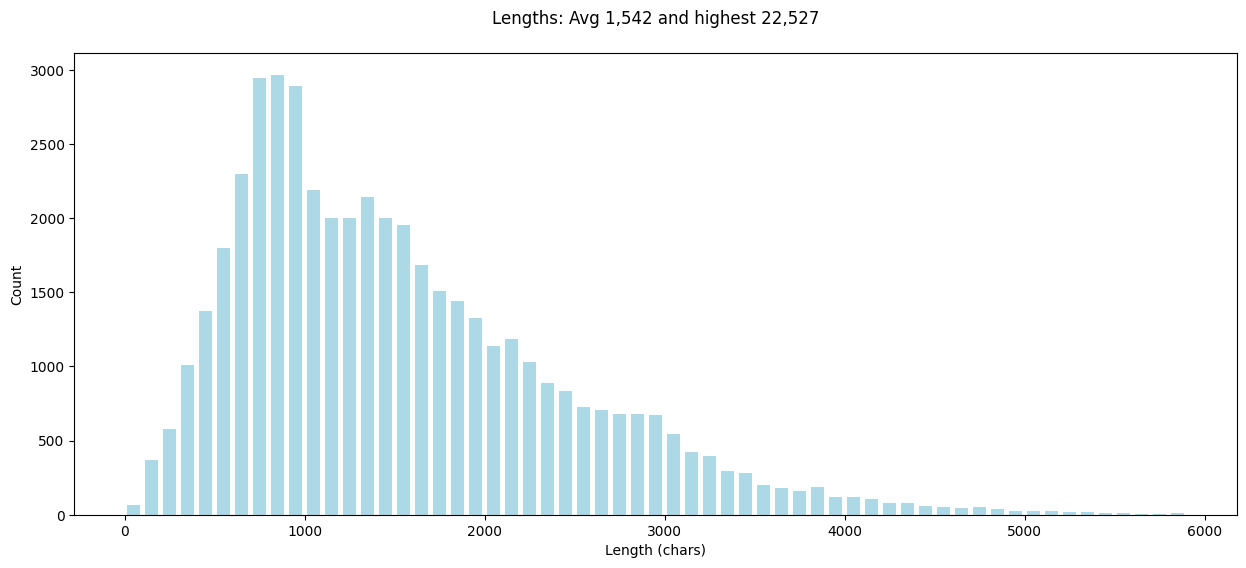

In [18]:
plt.figure(figsize=(15, 6))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()


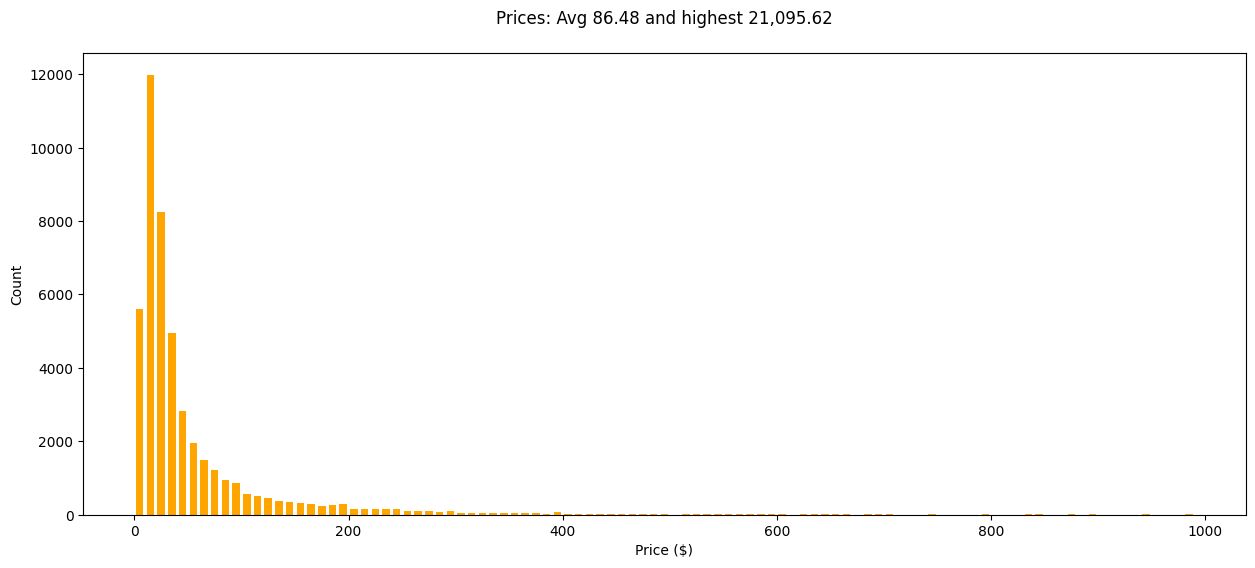

In [19]:
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()


In [34]:
from loaders import ItemLoader
from items import Item


In [35]:
items=ItemLoader("Appliances").load()

Loading dataset Appliances


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Completed Appliances with 33,385 datapoints in 1.2 mins


In [24]:
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 21000:
            print(datapoint['title'])
    except ValueError as e:
        pass


TurboChef BULLET Rapid Cook Electric Microwave Convection Oven


In [25]:

items = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            item = Item(datapoint, price)
            if item.include:
                items.append(item)
    except ValueError as e:
        pass

print(f"There are {len(items):,} items")


Token indices sequence length is longer than the specified maximum sequence length for this model (524 > 512). Running this sequence through the model will result in indexing errors


There are 33,976 items


In [ ]:
deepseek-ai/DeepSeek-Prover-V2-671B 
distilbert/distilbert-base-uncased


In [29]:
print(items[100].prompt)

How much does this cost to the nearest dollar?

Washer Shift Actuator Replacement Compatible with Whirlpool Washing Machine Replaces Part # Shift Actuator - 6 Pin, QTY Pack of 1, Synchronous Motor AC 120V 60HZ 4W 30mA 3RPM CW It fits for Whirlpool, Kenmore, Maytag, Amana and other brands washing machine. If you ' re not sure whether or not a parts you ' re ordering fits your model, please feel free to contact with us before ordering. Include your Model number. We can verify the part will fit your model It replaces This part fixes the following symptoms Pumps but will not spin. Will not agitate. Spins slowly Easy to install.

Price is $25.00


In [30]:
print(items[100].test_prompt())


How much does this cost to the nearest dollar?

Washer Shift Actuator Replacement Compatible with Whirlpool Washing Machine Replaces Part # Shift Actuator - 6 Pin, QTY Pack of 1, Synchronous Motor AC 120V 60HZ 4W 30mA 3RPM CW It fits for Whirlpool, Kenmore, Maytag, Amana and other brands washing machine. If you ' re not sure whether or not a parts you ' re ordering fits your model, please feel free to contact with us before ordering. Include your Model number. We can verify the part will fit your model It replaces This part fixes the following symptoms Pumps but will not spin. Will not agitate. Spins slowly Easy to install.

Price is $


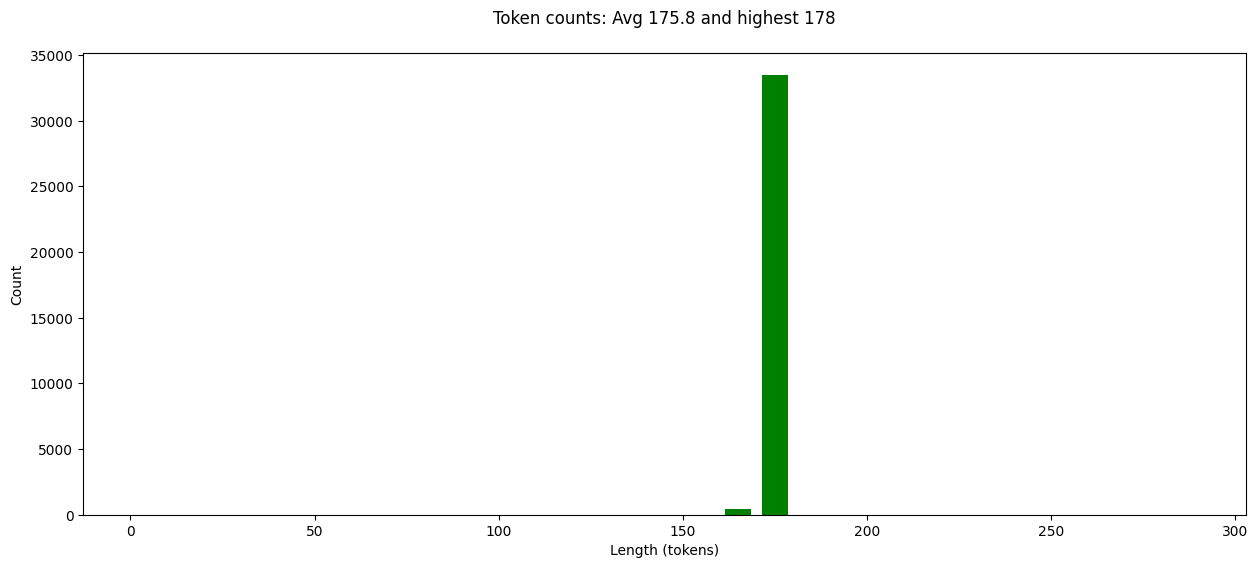

In [31]:

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="green", bins=range(0, 300, 10))
plt.show()


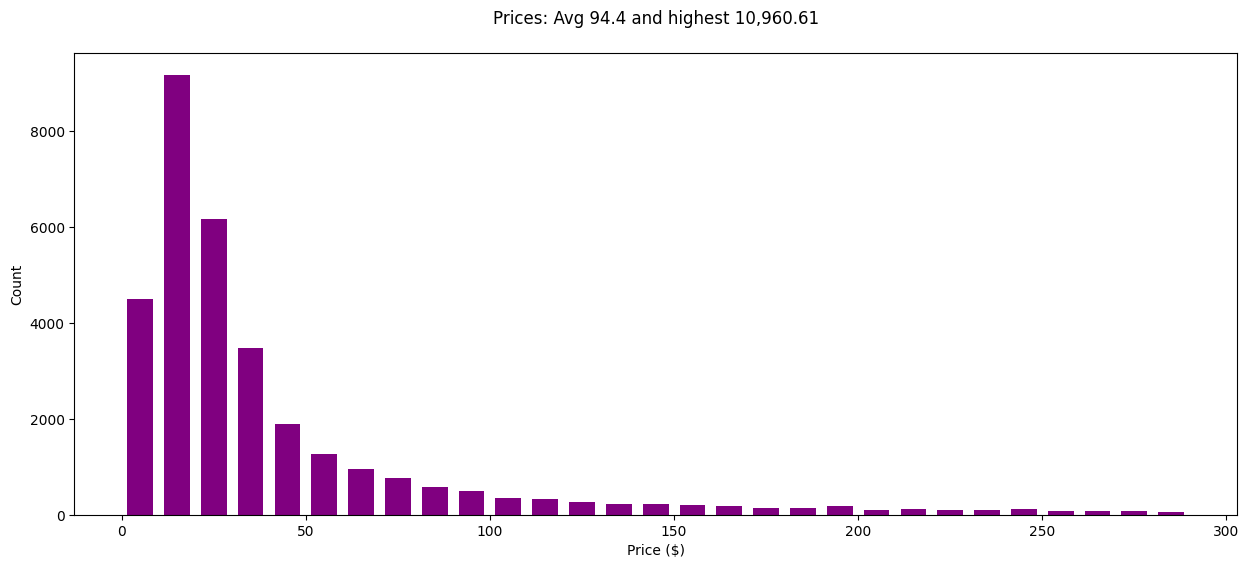

In [32]:

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="purple", bins=range(0, 300, 10))
plt.show()


     

In [37]:

dataset_names = [
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
]


In [39]:

items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())


Loading dataset Automotive


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [ ]:
print(f"A grand total of {len(items):,} items")